# Problem 4: U CNN on CIFAR-10

### Train a CNN with an architecture of your own choice with three convolutional layers with max- pooling and one linear layer. Take your minibatch size 100. You may take the Adam optimizer. Use the activation function of your choice. You may take your epochs 10 or more.

### 1. Compare the performance on your test set when you use the cross-entropy loss vs. the MSE loss.

In [12]:
import numpy as np
import torch
import torchvision
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [13]:
# Set random seeds for reproducibility
torch.manual_seed(0)
np.random.seed(0)

#### Cross entropy

In [9]:
# This architecture has three convolutional layers with 16, 32, and 64 output channels, 
# followed by max-pooling layers with a 2x2 kernel and stride of 2. 
# The output of the last convolutional layer is flattened and passed through a fully connected linear layer 
# with 10 output features.
class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.fc1 = nn.Linear(in_features=64*4*4, out_features=10)
        
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool2(x)
        
        x = self.conv3(x)
        x = self.relu(x)
        x = self.pool3(x)
        
        x = x.view(-1, 64*4*4)
        x = self.fc1(x)
        
        return x

# Adam optimizer, learning rate=0.001, batch size=100:
# define the model
model = MyCNN()

# define the loss function
criterion = nn.CrossEntropyLoss()

# define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# load the CIFAR-10 dataset
train_data = CIFAR10(root='./data', train=True, transform=ToTensor(), download=True)
test_data = CIFAR10(root='./data', train=False, transform=ToTensor(), download=True)

# create data loaders
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, batch_size=100, shuffle=False)

# Print training accuracy after every 100 mini-batches. 
# Evaluate the model on the test set after each epoch, and print the test loss and accuracy.
# train the model
num_epochs = 10

for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # compute training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print('[Epoch %d, Batch %5d] loss: %.3f, accuracy: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100, 100 * correct / total))
            running_loss = 0.0
            correct = 0
            total = 0
    
    # evaluate on test set
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print('[Epoch %d] test loss: %.3f, accuracy: %.3f' %
          (epoch + 1, test_loss / len(test_loader), 100 * correct / total))

print('Finished Training')

100%|██████████| 170498071/170498071 [00:12<00:00, 14092848.81it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
[Epoch 1, Batch   100] loss: 2.041, accuracy: 25.300
[Epoch 1, Batch   200] loss: 1.672, accuracy: 39.170
[Epoch 1, Batch   300] loss: 1.558, accuracy: 44.570
[Epoch 1, Batch   400] loss: 1.479, accuracy: 46.960
[Epoch 1, Batch   500] loss: 1.420, accuracy: 49.600
[Epoch 1] test loss: 1.373, accuracy: 51.120
[Epoch 2, Batch   100] loss: 1.388, accuracy: 50.210
[Epoch 2, Batch   200] loss: 1.338, accuracy: 51.990
[Epoch 2, Batch   300] loss: 1.295, accuracy: 54.600
[Epoch 2, Batch   400] loss: 1.268, accuracy: 55.050
[Epoch 2, Batch   500] loss: 1.237, accuracy: 57.000
[Epoch 2] test loss: 1.208, accuracy: 57.470
[Epoch 3, Batch   100] loss: 1.186, accuracy: 58.480
[Epoch 3, Batch   200] loss: 1.165, accuracy: 58.770
[Epoch 3, Batch   300] loss: 1.148, accuracy: 59.880
[Epoch 3, Batch   400] loss: 1.143, accuracy: 59.510
[Epoch 3, Batch   500] loss: 1.145, accuracy: 60.020
[Epoch 3] test loss: 1.162

### MSE loss

In [29]:
# modify the training loop to use one-hot encoded targets
# define the model
model = MyCNN()

# define the loss function
criterion = nn.MSELoss()

# define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# load the CIFAR-10 dataset
train_data = CIFAR10(root='./data', train=True, transform=ToTensor(), download=True)
test_data = CIFAR10(root='./data', train=False, transform=ToTensor(), download=True)

# create data loaders
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, batch_size=100, shuffle=False)

# train the model
num_epochs = 10

for epoch in range(num_epochs):
    running_loss = 0.0
    
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        
        # convert labels to one-hot encoding
        labels_onehot = nn.functional.one_hot(labels, num_classes=10).float()
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels_onehot)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print('[Epoch %d, Batch %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

        # evaluate on test set
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            
            # convert labels to one-hot encoding
            labels_onehot = nn.functional.one_hot(labels, num_classes=10).float()
        
            outputs = model(inputs)
            loss = criterion(outputs, labels_onehot)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print('[Epoch %d] test loss: %.3f, accuracy: %.3f' %
          (epoch + 1, test_loss / len(test_loader), 100 * correct / total))

print('Finished Training')

Files already downloaded and verified
Files already downloaded and verified
[Epoch 1, Batch   100] loss: 0.084
[Epoch 1, Batch   200] loss: 0.076
[Epoch 1, Batch   300] loss: 0.072
[Epoch 1, Batch   400] loss: 0.070
[Epoch 1, Batch   500] loss: 0.068
[Epoch 1] test loss: 0.067, accuracy: 52.570
[Epoch 2, Batch   100] loss: 0.066
[Epoch 2, Batch   200] loss: 0.064
[Epoch 2, Batch   300] loss: 0.062
[Epoch 2, Batch   400] loss: 0.062
[Epoch 2, Batch   500] loss: 0.062
[Epoch 2] test loss: 0.061, accuracy: 59.810
[Epoch 3, Batch   100] loss: 0.059
[Epoch 3, Batch   200] loss: 0.058
[Epoch 3, Batch   300] loss: 0.059
[Epoch 3, Batch   400] loss: 0.058
[Epoch 3, Batch   500] loss: 0.058
[Epoch 3] test loss: 0.057, accuracy: 64.390
[Epoch 4, Batch   100] loss: 0.056
[Epoch 4, Batch   200] loss: 0.056
[Epoch 4, Batch   300] loss: 0.055
[Epoch 4, Batch   400] loss: 0.055
[Epoch 4, Batch   500] loss: 0.055
[Epoch 4] test loss: 0.055, accuracy: 65.650
[Epoch 5, Batch   100] loss: 0.053
[Epoch 5,

In [30]:
# The test accuracy bottle-necked at around 70%. This is because MSE loss is typically not used for multi-class 
# classification tasks. Cross-entropy loss is a better choice.

### 2. Compare your models when you use Adam vs. RMSProp. You may use the cross entropy loss.

In [13]:
# define the models
model_adam = MyCNN()
model_rmsprop = MyCNN()

# define the loss function
criterion = nn.CrossEntropyLoss()

# define the optimizers
optimizer_adam = optim.Adam(model_adam.parameters(), lr=0.001)
optimizer_rmsprop = optim.RMSprop(model_rmsprop.parameters(), lr=0.001)

# load the CIFAR-10 dataset
train_data = CIFAR10(root='./data', train=True, transform=ToTensor(), download=True)
test_data = CIFAR10(root='./data', train=False, transform=ToTensor(), download=True)

# create data loaders
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, batch_size=100, shuffle=False)

# train the Adam model
num_epochs = 10

for epoch in range(num_epochs):
    running_loss = 0.0
    
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer_adam.zero_grad()
        
        # forward + backward + optimize
        outputs = model_adam(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_adam.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print('[Adam, Epoch %d, Batch %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

    # evaluate on test set
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            outputs = model_adam(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print('[Adam, Epoch %d] test loss: %.3f, accuracy: %.3f' %
          (epoch + 1, test_loss / len(test_loader), 100 * correct / total))

# train the RMSProp model
for epoch in range(num_epochs):
    running_loss = 0.0
    
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer_rmsprop.zero_grad()
        
        # forward + backward + optimize
        outputs = model_rmsprop(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_rmsprop.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print('[RMSProp, Epoch %d, Batch %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

    # evaluate on test set
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            outputs = model_rmsprop(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print('[RMSProp, Epoch %d] test loss: %.3f, accuracy: %.3f' %
          (epoch + 1, test_loss / len(test_loader), 100 * correct / total))

# print final results
print('Adam - test accuracy: %.3f' % (100 * correct / total))
print('RMSProp - test accuracy: %.3f' % (100 * correct / total))

Files already downloaded and verified
Files already downloaded and verified
[Adam, Epoch 1, Batch   100] loss: 2.052
[Adam, Epoch 1, Batch   200] loss: 1.684
[Adam, Epoch 1, Batch   300] loss: 1.566
[Adam, Epoch 1, Batch   400] loss: 1.526
[Adam, Epoch 1, Batch   500] loss: 1.475
[Adam, Epoch 1] test loss: 1.427, accuracy: 48.390
[Adam, Epoch 2, Batch   100] loss: 1.398
[Adam, Epoch 2, Batch   200] loss: 1.360
[Adam, Epoch 2, Batch   300] loss: 1.334
[Adam, Epoch 2, Batch   400] loss: 1.293
[Adam, Epoch 2, Batch   500] loss: 1.271
[Adam, Epoch 2] test loss: 1.215, accuracy: 56.660
[Adam, Epoch 3, Batch   100] loss: 1.198
[Adam, Epoch 3, Batch   200] loss: 1.198
[Adam, Epoch 3, Batch   300] loss: 1.193
[Adam, Epoch 3, Batch   400] loss: 1.167
[Adam, Epoch 3, Batch   500] loss: 1.134
[Adam, Epoch 3] test loss: 1.124, accuracy: 60.640
[Adam, Epoch 4, Batch   100] loss: 1.087
[Adam, Epoch 4, Batch   200] loss: 1.087
[Adam, Epoch 4, Batch   300] loss: 1.086
[Adam, Epoch 4, Batch   400] loss

### 3. Compare the performance with ReLU vs sigmoid activation with cross-entropy loss and Adam

In [9]:
import torchvision.transforms as transforms

# Define the CNN architecture
class MyCNN(nn.Module):
    def __init__(self, activation):
        super(MyCNN, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(in_features=64*4*4, out_features=10)

        if activation == 'relu':
            self.activation = nn.ReLU()
        elif activation == 'sigmoid':
            self.activation = nn.Sigmoid()

    def forward(self, x):
        x = self.conv1(x)
        x = self.activation(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.activation(x)
        x = self.pool2(x)

        x = self.conv3(x)
        x = self.activation(x)
        x = self.pool3(x)

        x = x.view(-1, 64*4*4)
        x = self.fc1(x)

        return x

# Set the device to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the data transforms and load the CIFAR10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True)
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False)

# Define the CNN model with ReLU activation and train it
cnn_relu = MyCNN('relu').to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_relu.parameters())
for epoch in range(10):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = cnn_relu(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        if i % 100 == 99:    # print every 100 mini-batches
            print('[Epoch %d, Batch %5d] loss: %.3f, accuracy: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100, 100 * correct_train / total_train))
            running_loss = 0.0
            correct_train = 0
            total_train = 0
    
    # evaluate on test set
    test_loss = 0.0
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = cnn_relu(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
    print('[Epoch %d] test loss: %.3f, accuracy: %.3f' %
          (epoch + 1, test_loss / len(testloader), 100 * correct_test / total_test))

print('Finished Training')

Files already downloaded and verified
Files already downloaded and verified
[Epoch 1, Batch   100] loss: 1.923, accuracy: 30.950
[Epoch 1, Batch   200] loss: 1.573, accuracy: 43.080
[Epoch 1, Batch   300] loss: 1.442, accuracy: 48.080
[Epoch 1, Batch   400] loss: 1.389, accuracy: 50.660
[Epoch 1, Batch   500] loss: 1.316, accuracy: 52.990
[Epoch 1] test loss: 1.275, accuracy: 54.710
[Epoch 2, Batch   100] loss: 1.231, accuracy: 55.770
[Epoch 2, Batch   200] loss: 1.223, accuracy: 57.160
[Epoch 2, Batch   300] loss: 1.179, accuracy: 58.360
[Epoch 2, Batch   400] loss: 1.140, accuracy: 60.400
[Epoch 2, Batch   500] loss: 1.118, accuracy: 59.980
[Epoch 2] test loss: 1.136, accuracy: 59.750
[Epoch 3, Batch   100] loss: 1.069, accuracy: 62.690
[Epoch 3, Batch   200] loss: 1.045, accuracy: 63.230
[Epoch 3, Batch   300] loss: 1.041, accuracy: 63.860
[Epoch 3, Batch   400] loss: 0.993, accuracy: 65.470
[Epoch 3, Batch   500] loss: 1.002, accuracy: 65.010
[Epoch 3] test loss: 1.024, accuracy: 6

### 4: Plot your training error as vs the number of epochs as for cross-entropy loss with ADam optimizer and ReLU activation.

Epoch 1: training loss = 1.563132
Epoch 2: training loss = 1.217679
Epoch 3: training loss = 1.055168
Epoch 4: training loss = 0.949653
Epoch 5: training loss = 0.873371
Epoch 6: training loss = 0.813927
Epoch 7: training loss = 0.767437
Epoch 8: training loss = 0.728658
Epoch 9: training loss = 0.696770
Epoch 10: training loss = 0.664112


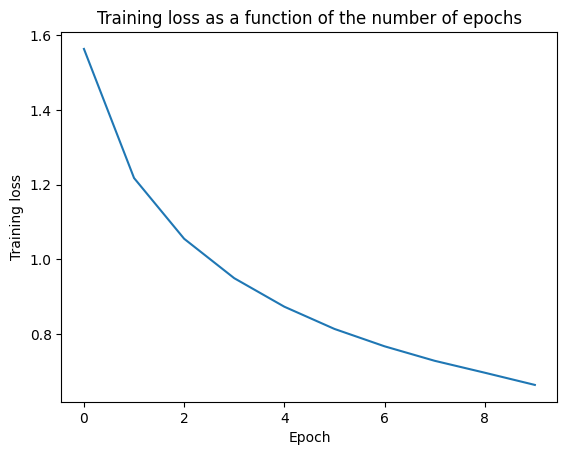

In [23]:
# epochs=10 , Adam optimizer, ReLU activation
# Plot the training loss (y-axis) vs. of the number of epochs (x-axis)
# Define the CNN model with ReLU activation and train it
cnn_relu = MyCNN('relu').to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_relu.parameters())
train_loss = []
for epoch in range(10):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = cnn_relu(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    train_loss.append(running_loss / len(trainloader))
    print('Epoch %d: training loss = %f' % (epoch + 1, train_loss[-1]))

# Plot the training loss as a function of the number of epochs
plt.plot(range(10), train_loss)
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.title('Training loss as a function of the number of epochs')
plt.show()

### 5. For part 4 of the problem show the last convolutional layers as images for a single sample. Do you get anything interpretable?

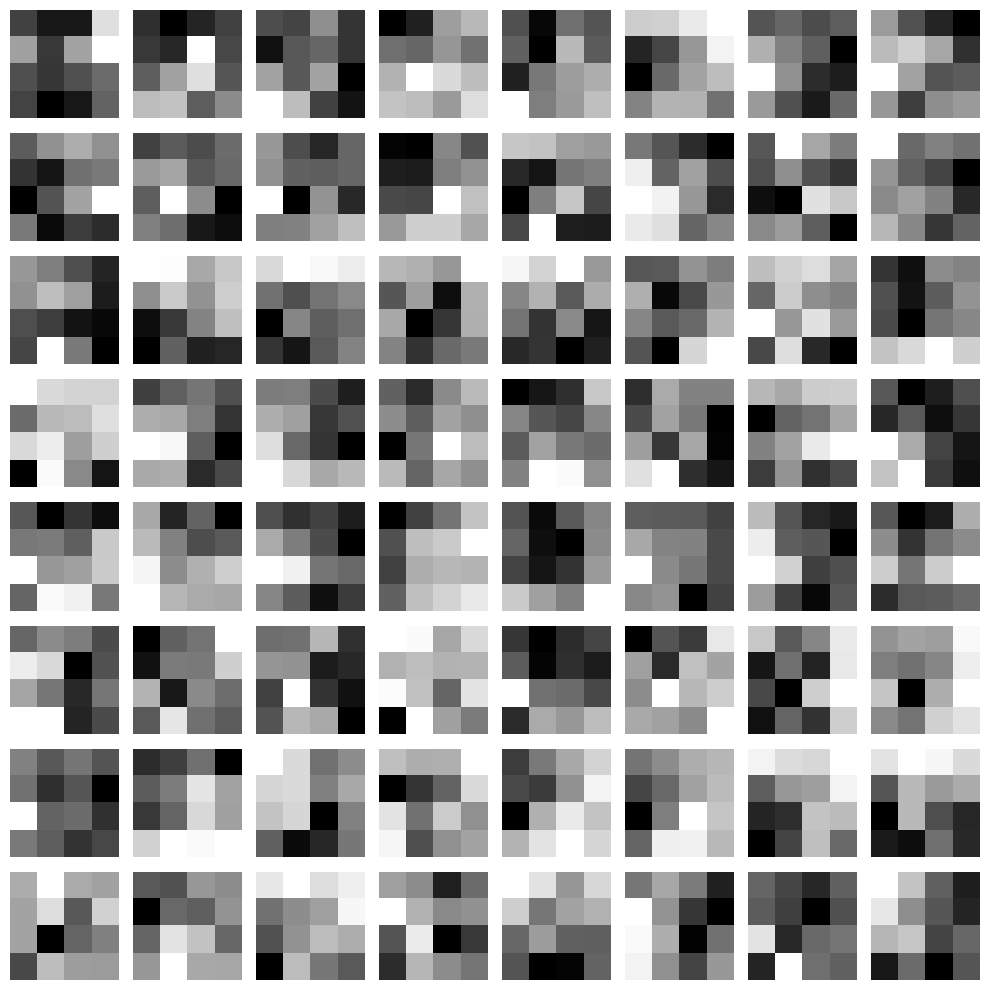

In [26]:
# Define the CNN model with ReLU activation and extract the last convolutional layers
cnn_relu = MyCNN('relu').to(device)
cnn_layers = nn.Sequential(*list(cnn_relu.children())[:-2])

# Retrieve a single sample from the test set
sample, label = next(iter(testloader))
sample = sample.to(device)
label = label.to(device)

# Apply the CNN layers to the sample and get the output of the last convolutional layers
features = cnn_layers(sample)
features_np = features.cpu().detach().numpy()

# Plot the output of the last convolutional layers as images
fig, axs = plt.subplots(8, 8, figsize=(10, 10))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(features_np[0, i*8+j, :, :], cmap='gray')
        axs[i, j].axis('off')
plt.tight_layout()
plt.show()

# The output of the last convolutional layers is not interpretable, as it represents a high-level feature representation of 
# the input image. However, it can give us some insights into what the CNN has learned to extract from.